In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib import colors

In [2]:
#name,density,conductivity,capacity,color
materials = [
    ['air',1.2,0.0259,1007,[0.,0.,0.,0.]],
    ['D300',300,0.08,840,'gray'],
    ['sand',1680,0.33,800,'yellow'],
    ['EPPS',100,0.03,1260,'blue']
]

In [3]:
MAX_X = 6.2
MAX_Y = 6.2
dx = 0.05

NX = int(MAX_X/dx)+1
NY = int(MAX_Y/dx)+1

space = np.zeros((NY,NX),dtype=int)

In [4]:
for x in range(0,NX):
    cx = x - NX/2
    for y in range(0,NY):
        cy = y - NY/2
        
        if cx*cx + cy*cy < 4/dx/dx:
            space[x,y] = 2
        elif cx*cx + cy*cy < 9/dx/dx:
            space[x,y] = 3


In [5]:
#%matplotlib notebook

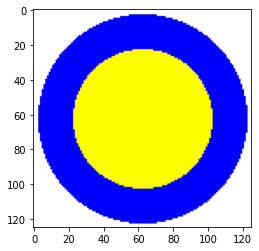

In [6]:
fig = plt.figure()
Space_image = np.zeros((NY,NX,4))

for i in range(1,len(materials)):
    Space_image += (space==i)[:,:,np.newaxis]*colors.to_rgba(materials[i][4])
    

imgplot = plt.imshow(Space_image)

In [20]:
T_min = -15
T_max = 500
T = np.zeros((NY,NX))

def setTempLimits():
    global T
    T = (space==0)*-15 + (space!=0)*T

def zeroTemp():
    global T
    T[:] = 0
    T = (space==2)*500 + (space!=2)*T
    setTempLimits()


zeroTemp()

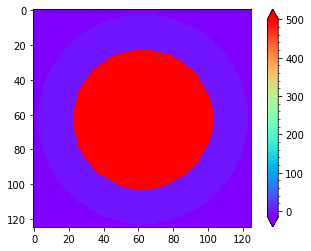

In [21]:
def drawTemp():
    global T_min
    global T_max
    
    fig = plt.figure()
    ax = plt.axes()
    
    imgplot = plt.imshow(T,cmap='rainbow',vmin=T_min,vmax=T_max, interpolation='none')
    cbar = fig.colorbar(imgplot, ax=ax, extend='both')
    cbar.minorticks_on()
    plt.show()

drawTemp()

In [22]:
dt=1

Q = np.zeros((NY,NX))
S = np.zeros((NY,NX))

for i in range(0,len(materials)):
    m = materials[i]
    q = m[1]*m[3]*dx**2
    s = dt*m[2]
    print(f'material={m[0]} q={q}J s={s}J s/q={s/q}')
    Q= (space==i)*q + (space!=i)*Q
    S= (space==i)*s + (space!=i)*S
    
Qc = Q[1:-1,1:-1]

Sc = S[1:-1,1:-1]
Sl = S[1:-1,0:-2]
Sr = S[1:-1,2:]
Su = S[0:-2,1:-1]
Sd = S[2:,1:-1]

Kl = (Sl+Sc)/2/Qc
Kr = (Sr+Sc)/2/Qc
Ku = (Su+Sc)/2/Qc
Kd = (Sd+Sc)/2/Qc

material=air q=3.0210000000000004J s=0.0259J s/q=0.008573320092684541
material=D300 q=630.0000000000001J s=0.08J s/q=0.00012698412698412695
material=sand q=3360.0000000000005J s=0.33J s/q=9.82142857142857e-05
material=EPPS q=315.00000000000006J s=0.03J s/q=9.523809523809521e-05


In [23]:
def tempRound():
    
    global T
    global Kl
    global Kr
    global Ku
    global Kd
    
    t=60*60*24*10
    nt = int(t/dt)

    for n in range(0,nt):
        Tn = T.copy();
        Tc = Tn[1:-1,1:-1]
        Tl = Tn[1:-1,0:-2]
        Tr = Tn[1:-1,2:]
        Tu = Tn[0:-2,1:-1]
        Td = Tn[2:,1:-1]

        T[1:-1,1:-1] = Tc +\
            Kl*(Tl-Tc)+\
            Kr*(Tr-Tc)+\
            Ku*(Tu-Tc)+\
            Kd*(Td-Tc)


        setTempLimits()

day=0


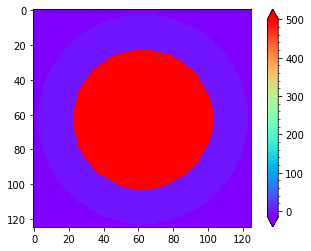

day=10


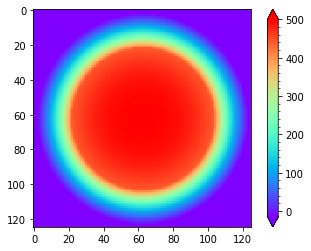

day=20


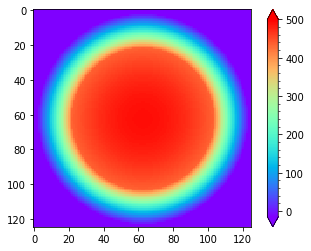

day=30


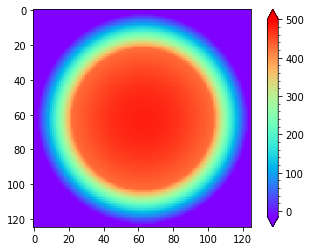

day=40


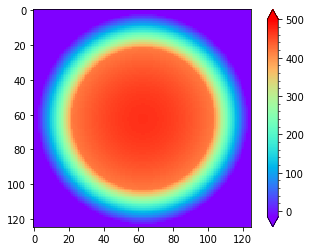

day=50


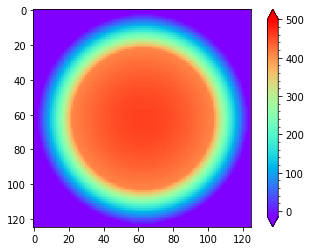

day=60


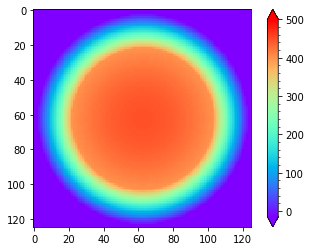

day=70


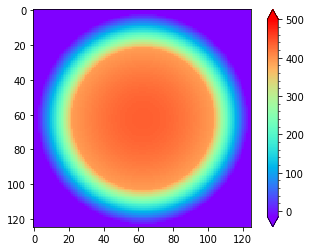

day=80


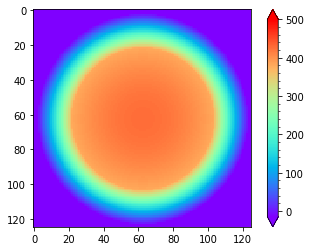

day=90


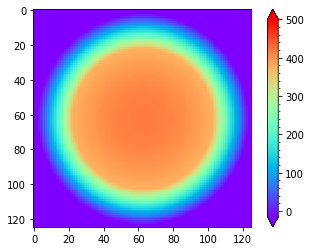

In [24]:
for i in range(0,100,10):
    print(f'day={i}')
    if i!=0:
        tempRound()
    drawTemp()
